데이터 분석 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np


# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할
from sklearn.model_selection import train_test_split

# 분류 SVM
from sklearn.svm import SVC

# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier


# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Check the Frequency of Variable
from collections import Counter


# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')


import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = 'NanumGothic')
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)


In [19]:
df_raw=pd.read_csv("./ffinalcar.csv")

In [20]:
df_raw

,Unnamed: 0,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,n_price
0,0,Maruti Wagon R LXI CNG,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,5.0,10033
1,1,Hyundai Creta 1.6 CRDi SX Option,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,5.0,33018
2,2,Honda Jazz V,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,5.0,15472
3,3,Maruti Ertiga VDI,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,7.0,20042
4,4,Audi A4 New 2.0 TDI Multitronic,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,5.0,80092
...,...,...,...,...,...,...,...,...,...,...,...,...
6195,6195,Tata Tiago 1.05 Revotorq XT Option,10822.70,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,5.0,14963
6196,6196,Ford EcoSport 1.5 Petrol Ambiente,13474.72,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,5.0,25862
6197,6197,Jeep Compass 1.4 Sport,27838.55,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,5.0,38939
6198,6198,Maruti Vitara Brezza ZDi,16203.39,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,5.0,22982


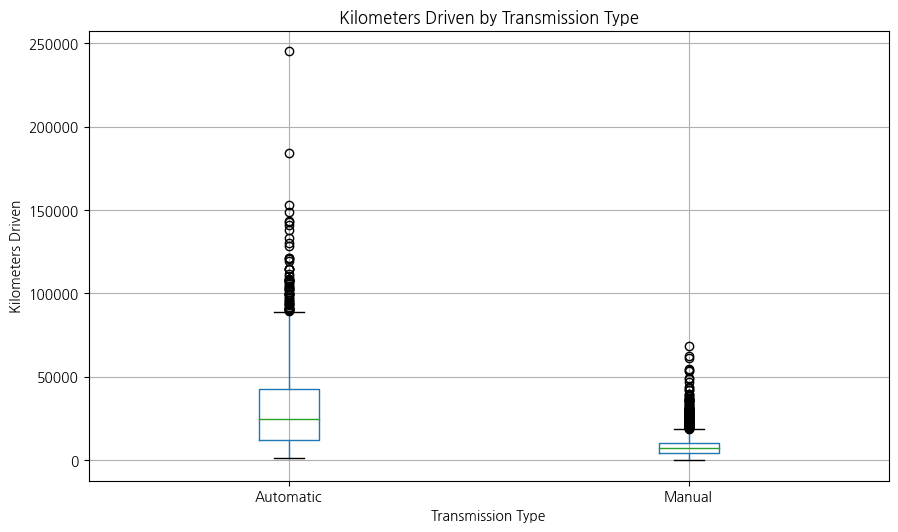

In [21]:
df_raw.boxplot(column="Price", by="Transmission", grid=True, figsize=(10, 6))
plt.title("Kilometers Driven by Transmission Type")
plt.suptitle("")  # 자동 생성되는 상단 제목을 제거
plt.xlabel("Transmission Type")
plt.ylabel("Kilometers Driven")
plt.show()

In [22]:
df_num=df_raw.select_dtypes(exclude = "object")
df_num

,Unnamed: 0,Price,Year,Kilometers_Driven,Seats,n_price
0,0,2682.68,2010,72000,5.0,10033
1,1,19162.00,2015,41000,5.0,33018
2,2,6898.32,2011,46000,5.0,15472
3,3,9197.76,2012,87000,7.0,20042
4,4,27194.71,2013,40670,5.0,80092
...,...,...,...,...,...,...
6195,6195,10822.70,2016,41413,5.0,14963
6196,6196,13474.72,2017,39015,5.0,25862
6197,6197,27838.55,2018,6000,5.0,38939
6198,6198,16203.39,2017,21380,5.0,22982


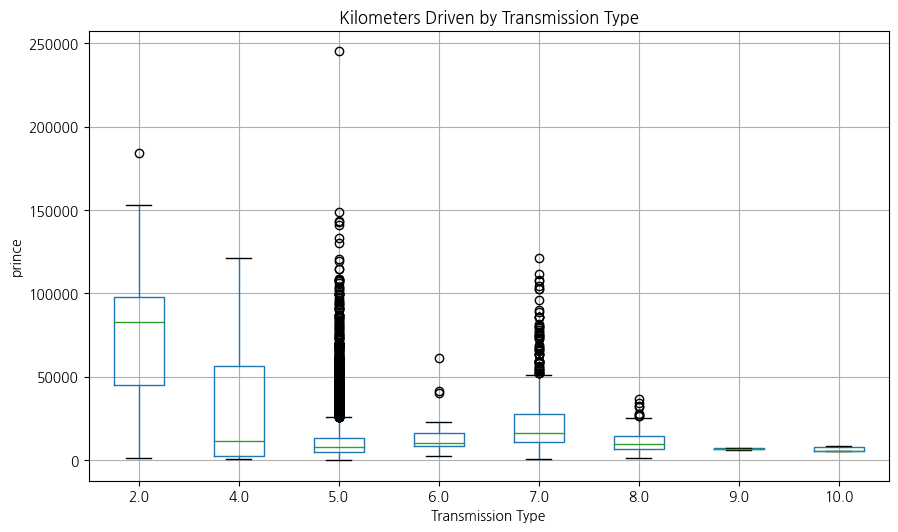

In [11]:
df_raw.boxplot(column="Price", by="Seats", grid=True, figsize=(10, 6))
plt.title("Kilometers Driven by Transmission Type")
plt.suptitle("")  # 자동 생성되는 상단 제목을 제거
plt.xlabel("Transmission Type")
plt.ylabel("prince")
plt.show()

In [26]:
# len(df_raw[(df_raw['Price']>70000) & (df_raw['Seats']==7.0)])

82

In [28]:
lendf_raw[(df_raw['Price']>70000) & (df_raw['Seats']==7.0)]

,Unnamed: 0,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,n_price
282,282,Audi Q7 3.0 TDI Quattro Technology,107859.07,2018,11287,Diesel,Automatic,First,12.07 kmpl,2967 CC,7.0,46723
327,327,Audi Q7 45 TDI Quattro Technology,96070.60,2017,97430,Diesel,Automatic,First,14.75 kmpl,2967 CC,7.0,138210
459,459,Audi Q7 4.2 TDI Quattro Technology,74977.07,2016,51002,Diesel,Automatic,First,11.33 kmpl,4134 CC,7.0,129067
489,489,Mercedes-Benz GLS 350d 4MATIC,85845.76,2017,129000,Diesel,Automatic,First,11.0 kmpl,2987 CC,7.0,144460
918,918,BMW X5 2014-2019 xDrive 30d Design Pure Experi...,88911.68,2016,76000,Diesel,Automatic,First,15.97 kmpl,2993 CC,7.0,131696
1038,1038,Land Rover Range Rover TDV8 (Diesel),102708.32,2011,55000,Diesel,Automatic,First,10.2 kmpl,4367 CC,7.0,88116
1093,1093,Audi Q7 4.2 TDI Quattro Technology,78180.96,2014,50000,Diesel,Automatic,First,11.33 kmpl,4134 CC,7.0,127968
1336,1336,Audi Q7 45 TDI Quattro Technology,102708.32,2016,20002,Diesel,Automatic,First,14.75 kmpl,2967 CC,7.0,131685
1352,1352,Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel,107307.20,2012,66538,Diesel,Automatic,First,10.2 kmpl,4367 CC,7.0,12681
1541,1541,Mercedes-Benz GL-Class 2007 2012 350 CDI Luxury,75115.04,2014,52000,Diesel,Automatic,First,12.0 kmpl,2987 CC,7.0,127004


<Axes: xlabel='Seats', ylabel='Count'>

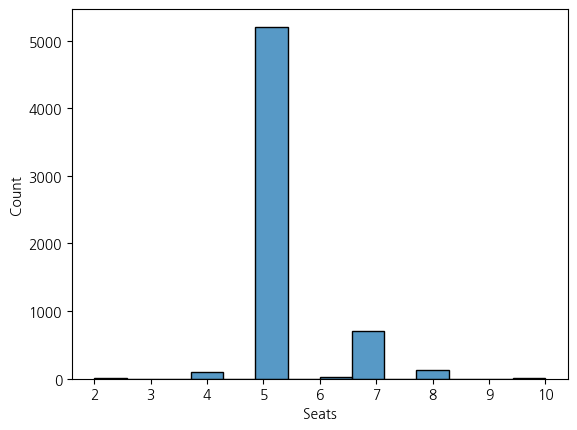

In [29]:
sns.histplot(data=df_raw, x="Seats")

In [30]:
len(df_raw[df_raw['Seats']==2.0])

17

In [32]:
min(df_raw['Price'])

7.08

In [35]:
df_raw[df_raw['Price']<100ㄹ00]

,Unnamed: 0,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,n_price
0,0,Maruti Wagon R LXI CNG,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,5.0,10033
2,2,Honda Jazz V,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,5.0,15472
3,3,Maruti Ertiga VDI,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,7.0,20042
5,5,Hyundai EON LPG Era Plus Option,3602.46,2012,75000,LPG,Manual,First,21.1 kmpl,814 CC,5.0,7118
6,6,Nissan Micra Diesel XV,5365.36,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,5.0,18970
...,...,...,...,...,...,...,...,...,...,...,...,...
6173,6173,Tata Tiago 1.2 Revotron XT,8523.26,2017,30631,Petrol,Manual,First,23.84 kmpl,1199 CC,5.0,16548
6184,6184,Tata Tiago 1.2 Revotron XZ WO Alloy,9902.92,2016,30010,Petrol,Manual,First,23.84 kmpl,1199 CC,5.0,17883
6189,6189,Maruti Alto K10 VXI,6269.81,2016,27535,Petrol,Manual,First,24.07 kmpl,998 CC,5.0,11998
6194,6194,Datsun GO T Petrol,8477.27,2016,36000,Petrol,Manual,First,19.83 kmpl,1198 CC,5.0,15718


In [34]:
df_raw[df_raw['Name']=="Hyundai Elite i20 Magna Plus"]

,Unnamed: 0,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,n_price
6199,6199,Hyundai Elite i20 Magna Plus,7.08,2018,23955,Petrol,Manual,First,18.6 kmpl,1197 CC,5.0,9846
